# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [2]:
#!!pip uninstall tensorflow
#!pip install tensorflow==2.0.0

In [3]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
%tensorflow_version 2.x
import tensorflow as tf

## Get Required Files from Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [5]:
#Set your project path 
project_path = '/content/drive/My Drive/GreatLearning/myprojects/NLP_Project/Data/' ## Add your path here ##

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [6]:
import pandas as pd
df = pd.read_json(project_path + 'Sarcasm_Headlines_Dataset.json', lines = True)

In [7]:
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [8]:
df["is_sarcastic"].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [9]:
df.drop(['article_link'],axis=1,inplace=True)

In [10]:
df

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [11]:
text_word_count = []
for i in df['headline']:
      text_word_count.append(len(i.split()))

In [12]:
text_word_count

[12,
 14,
 14,
 13,
 11,
 4,
 7,
 14,
 7,
 9,
 10,
 8,
 12,
 10,
 8,
 8,
 16,
 7,
 9,
 3,
 7,
 16,
 11,
 9,
 13,
 7,
 8,
 4,
 7,
 7,
 8,
 10,
 12,
 9,
 8,
 8,
 5,
 15,
 11,
 10,
 10,
 15,
 8,
 8,
 8,
 6,
 15,
 11,
 7,
 4,
 4,
 11,
 9,
 13,
 14,
 11,
 11,
 9,
 10,
 12,
 4,
 5,
 6,
 13,
 12,
 9,
 12,
 17,
 7,
 7,
 8,
 9,
 9,
 8,
 13,
 11,
 9,
 10,
 5,
 8,
 10,
 8,
 10,
 13,
 10,
 11,
 14,
 11,
 17,
 13,
 4,
 19,
 12,
 8,
 11,
 9,
 10,
 10,
 11,
 9,
 7,
 12,
 9,
 10,
 6,
 9,
 7,
 10,
 6,
 11,
 12,
 12,
 7,
 22,
 9,
 11,
 10,
 19,
 12,
 13,
 8,
 3,
 10,
 10,
 9,
 9,
 11,
 8,
 4,
 14,
 11,
 8,
 6,
 11,
 8,
 7,
 11,
 9,
 11,
 9,
 11,
 11,
 8,
 6,
 10,
 8,
 10,
 9,
 11,
 15,
 9,
 8,
 6,
 11,
 7,
 9,
 8,
 11,
 7,
 18,
 9,
 7,
 9,
 14,
 14,
 13,
 9,
 15,
 11,
 8,
 8,
 10,
 14,
 9,
 9,
 6,
 12,
 5,
 10,
 7,
 13,
 14,
 8,
 7,
 10,
 9,
 15,
 10,
 11,
 11,
 11,
 12,
 6,
 8,
 9,
 12,
 6,
 8,
 12,
 16,
 7,
 14,
 12,
 9,
 7,
 13,
 6,
 7,
 12,
 9,
 10,
 6,
 13,
 15,
 6,
 22,
 9,
 11,
 15,
 9,
 12,
 10,

In [13]:
print('maximum length sentence has',max(text_word_count),'words')

maximum length sentence has 39 words


#**## Modelling**

## Import required modules required for modelling.

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.backend import clear_session

# Set Different Parameters for the model. ( 2 marks)

In [15]:
max_features = 10000
maxlen = max(text_word_count)## Add your max length here ##
embedding_size = 200

In [16]:
maxlen

39

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [17]:
tokenizer = Tokenizer(num_words=max_features)

In [18]:
tokenizer.fit_on_texts(list(df['headline']))

# Define X and y for your model.

In [19]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  307  678 3336 2297   47  381 2575    5 2576 8433]
Number of Labels:  26709
0


In [20]:
X.shape

(26709, 39)

In [21]:
y.shape

(26709,)

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [22]:
word_index = tokenizer.word_index

In [23]:
word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

In [24]:

len(word_index)

29656

#**## Word Embedding**

## Get Glove Word Embeddings

In [25]:
glove_file = project_path + "glove.6B.zip"

In [26]:
glove_file

'/content/drive/My Drive/GreatLearning/myprojects/NLP_Project/Data/glove.6B.zip'

In [27]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [28]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [29]:
num_words=len(word_index)+1
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [30]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))
clear_session()
model = Sequential()

model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))

model.add(Bidirectional(LSTM(128, recurrent_dropout=0.5, dropout=0.5, return_sequences = True)))

model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=1,activation='sigmoid')) # Binary classification Layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         5931400   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
dense (Dense)                (None, None, 200)         51400     
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           201       
Total params: 6,319,897
Trainable params: 6,319,897
Non-trainable params: 0
_________________________________________________________________


# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [32]:
batch_size = 100
epochs = 5

## Add your code here ##
history = model.fit(X, y, epochs=5, batch_size=100, validation_split=0.2)

Epoch 1/5
214/214 [==============================] - 133s 622ms/step - loss: 0.5057 - accuracy: 0.7471 - val_loss: 0.3723 - val_accuracy: 0.8402
Epoch 2/5
214/214 [==============================] - 134s 626ms/step - loss: 0.3378 - accuracy: 0.8532 - val_loss: 0.3318 - val_accuracy: 0.8595
Epoch 3/5
214/214 [==============================] - 133s 622ms/step - loss: 0.2639 - accuracy: 0.8916 - val_loss: 0.3130 - val_accuracy: 0.8648
Epoch 4/5
214/214 [==============================] - 133s 619ms/step - loss: 0.2157 - accuracy: 0.9141 - val_loss: 0.3219 - val_accuracy: 0.8676
Epoch 5/5
214/214 [==============================] - 133s 623ms/step - loss: 0.1766 - accuracy: 0.9303 - val_loss: 0.3430 - val_accuracy: 0.8626


Validation Accuracy seems to be around 86.2 % for 5 epochs

In [34]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


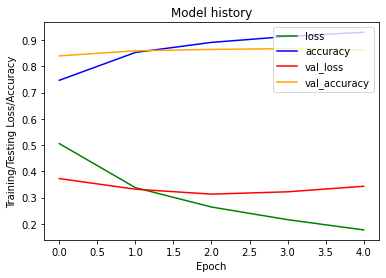

In [36]:
# Summary - History for loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], color = 'green')
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'orange')
plt.title('Model history')
plt.ylabel('Training/Testing Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy', 'val_loss','val_accuracy'], loc='upper right')
plt.show();